# Численные методы

### Реализовать расчет производной для заданной функции в точке из интервала $[x_{0}, x_{1}]$, построить её график 

Будет рассмотрена функция: $ f(x) = x^{2}e^{x} $ на отрезке $[-8, 2]$

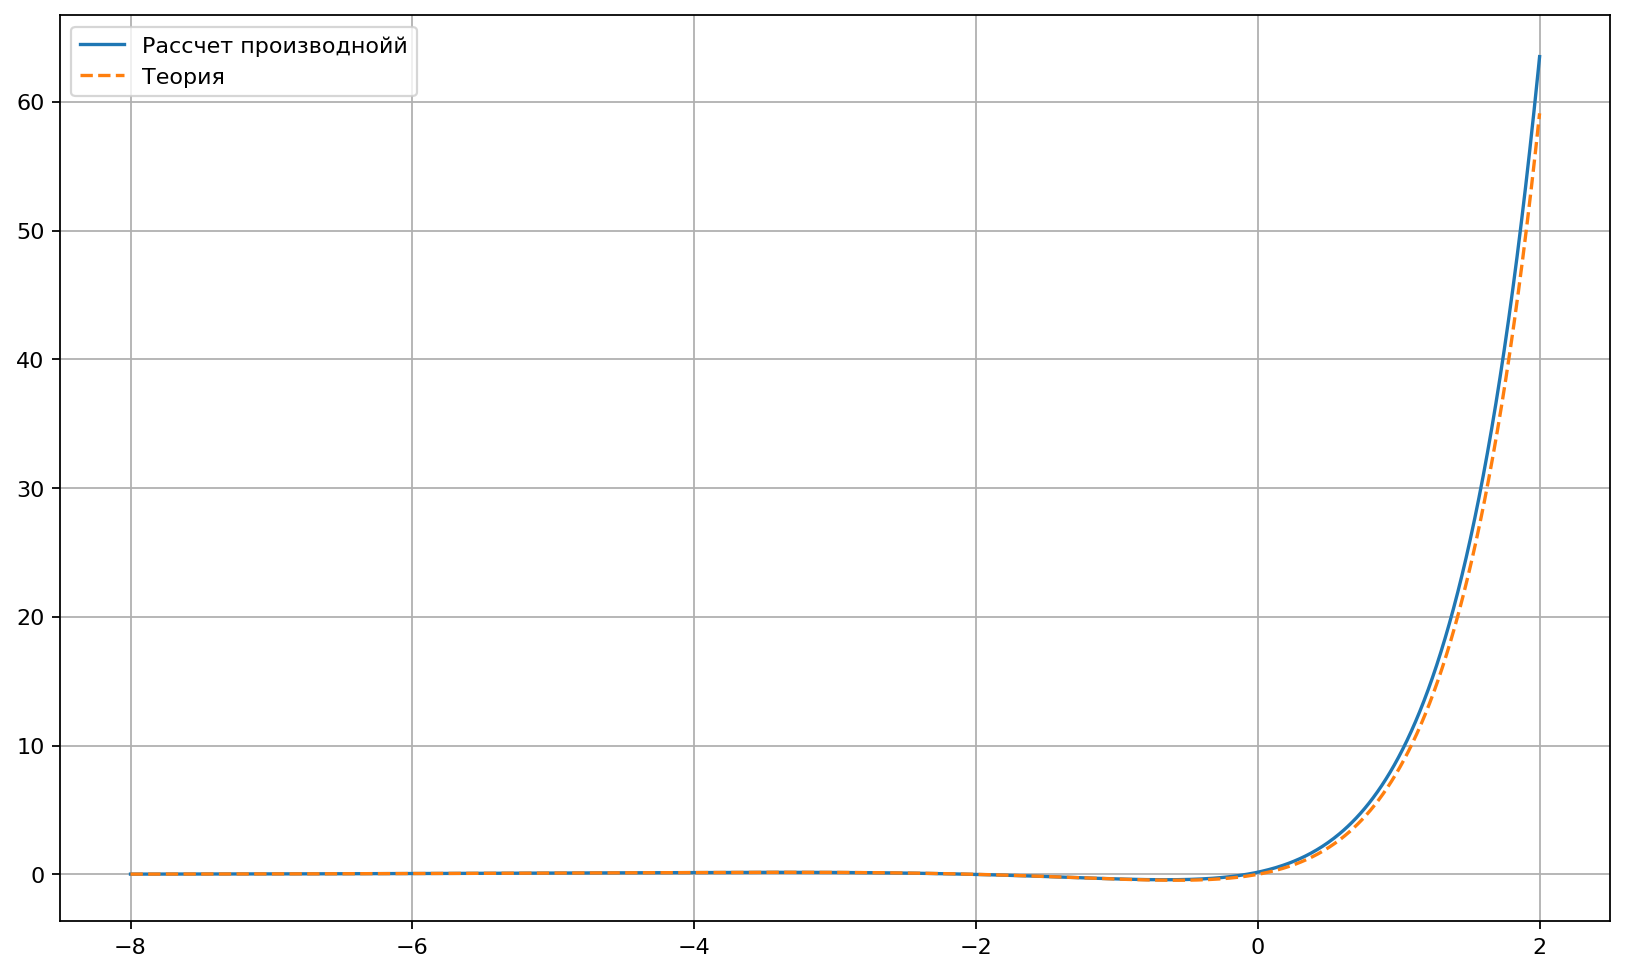

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-8, 2, 1000)
y = np.power(x, 2) * np.exp(x) # our function

dx = 0.4 # accruracy

y1 = (np.power(x + dx, 2) * np.exp(x + dx) - np.power(x - dx, 2) * np.exp(x - dx)) / (2 * dx) # using method
y2 = np.power(x, 2) * np.exp(x) + 2 * x * np.exp(x) # theoretical


fig, ax = plt.subplots(figsize=(12.5, 7.5), dpi=160)
ax.plot(x, y1, linestyle = '-', label = "Рассчет производнойй")
ax.plot(x, y2, linestyle = '--', label = "Теория")

plt.legend()
plt.grid(True)
plt.show()

### Реализовать вычисление интеграла методом прямоугольников

Будет рассмотрена функция: $ f(x) = x cos^{2}(x) + e^{x} $ на отрезке $ [0, \pi] $

Для реализации воспользуемся методом правых прямоугольников

$$\int_{a}^{b} f(x)dx \approx \sum_{j=1}^{N} f(x_{j})\cdot{h}$$

In [48]:
N = 1000 # accuracy
a = 0
b = np.pi
h = (b - a) / N

x = np.linspace(a, b, N)
y = x * np.power(np.cos(x), 2) + np.exp(x)

integrate = 0

for i in y:
    integrate += i * h
    
print("Результат вычисления: ", integrate)
print("Точный результат", 24.6081)


Результат вычисления:  24.62635878104793
Точный результат 24.6081


### Реализовать вычисление интеграла методом трапеции

Будет рассмотрена функция: $ f(x) = x cos^{2}(x) + e^{x} $ на отрезке $ [0, \pi] $

$$\int_{a}^{b} f(x)dx \approx \sum_{j=1}^{N} \frac{f(x_{j}) + f(x_{j-1})}{2}h = h[\frac{1}{2}(f_{1} + f_{N}) + f_{2} + ... + f_{N-1}]$$

In [47]:
N = 1000 # accuracy
a = 0
b = np.pi
h = (b - a) / N

x = np.linspace(a, b, N)
y = x * np.power(np.cos(x), 2) + np.exp(x)

integrate = 0

for i in range(1, N):
    integrate += (y[i] + y[i - 1])*h / 2
    
print("Результат вычисления: ", integrate)
print("Точный результат", 24.6081)

Результат вычисления:  24.583503867533555
Точный результат 24.6081


### Реализовать вычисление интеграла методом Симпсона

Будет рассмотрена функция: $ f(x) = x cos^{2}(x) + e^{x} $ на отрезке $ [0, \pi] $

$$\int_{a}^{b}f(x)dx \approx \frac{h}{3}[f_{0}+f_{2N}+2\sum_{j=2,2}^{2N-2} f_{j} + 4\sum_{j=1,2}^{2N-1} f_{j}]$$

In [53]:
N = 1000 # accuracy
a = 0
b = np.pi
h = (b - a) / N

x = np.linspace(a, b, N)
y = x * np.power(np.cos(x), 2) + np.exp(x)

integrate += y[0] + y[N - 1]

for i in range(2, int(N / 2 - 1)):
    integrate += 2 * y[2 * i]
    
for i in range(1, int(N / 2)):
    integrate += 4 * y[2 * i - 1]
    
integrate = integrate * h / 3
    
print("Результат вычисления: ", integrate)
print("Точный результат", 24.6081)

Результат вычисления:  24.524764665604483
Точный результат 24.6081


### Построить график функции

$$ f(x) = x cos^{2}(x) + e^{x} $$

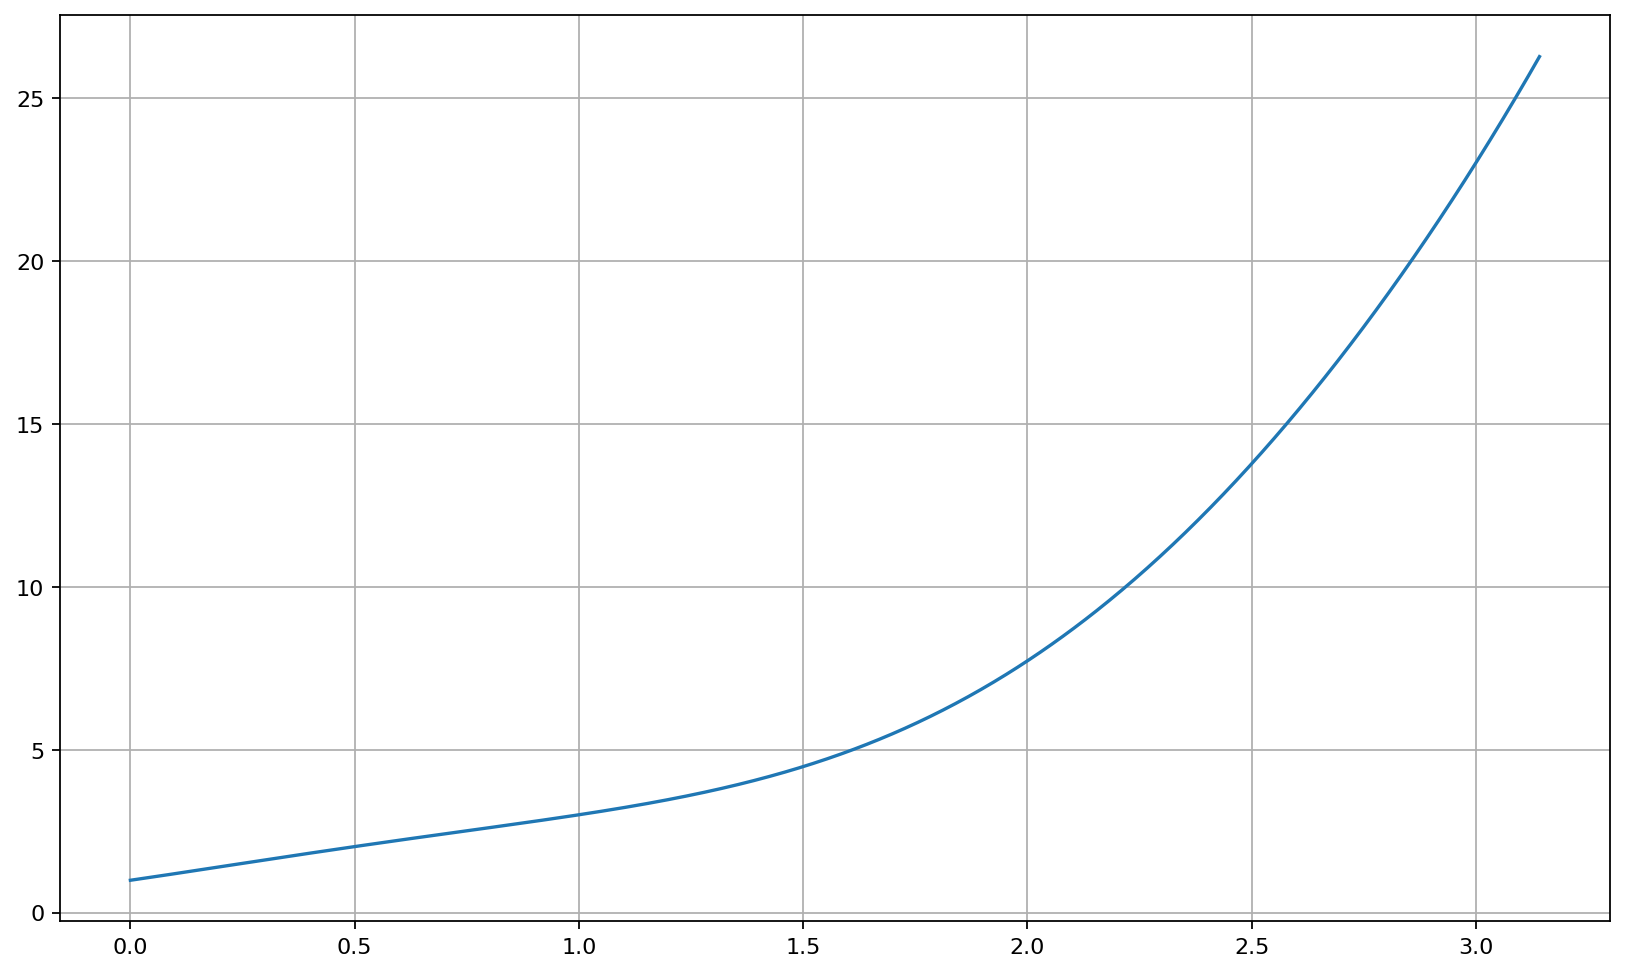

In [11]:
x = np.linspace(0, np.pi, 1000)
y = x * np.power(np.cos(x), 2) + np.exp(x)

fig, ax = plt.subplots(figsize = (12.5, 7.5), dpi = 160)

ax.plot(x, y, '-')
plt.grid(True)
plt.show()

## Задачи с начальными условиями для систем обыкновенных дифференциальных уравнений

Пусть:

$y'(t) = t\sqrt{y(t)}$ 

$t_0=0, \ y_0=y(t_0)=y(0)=1$, $t=0,\ldots,10,\ \delta t = \tau=0.1$

Где точное решение:

$y(t)=\frac{1}{16}(t^2+4)^2$

### Реализовать метод Эйлера 

$$ \frac{d \pmb{u}}{d t} = \pmb{F}(t, \pmb{u}), \quad t > 0, $$
$$ \pmb{u}(0) = \pmb{u}_0$$

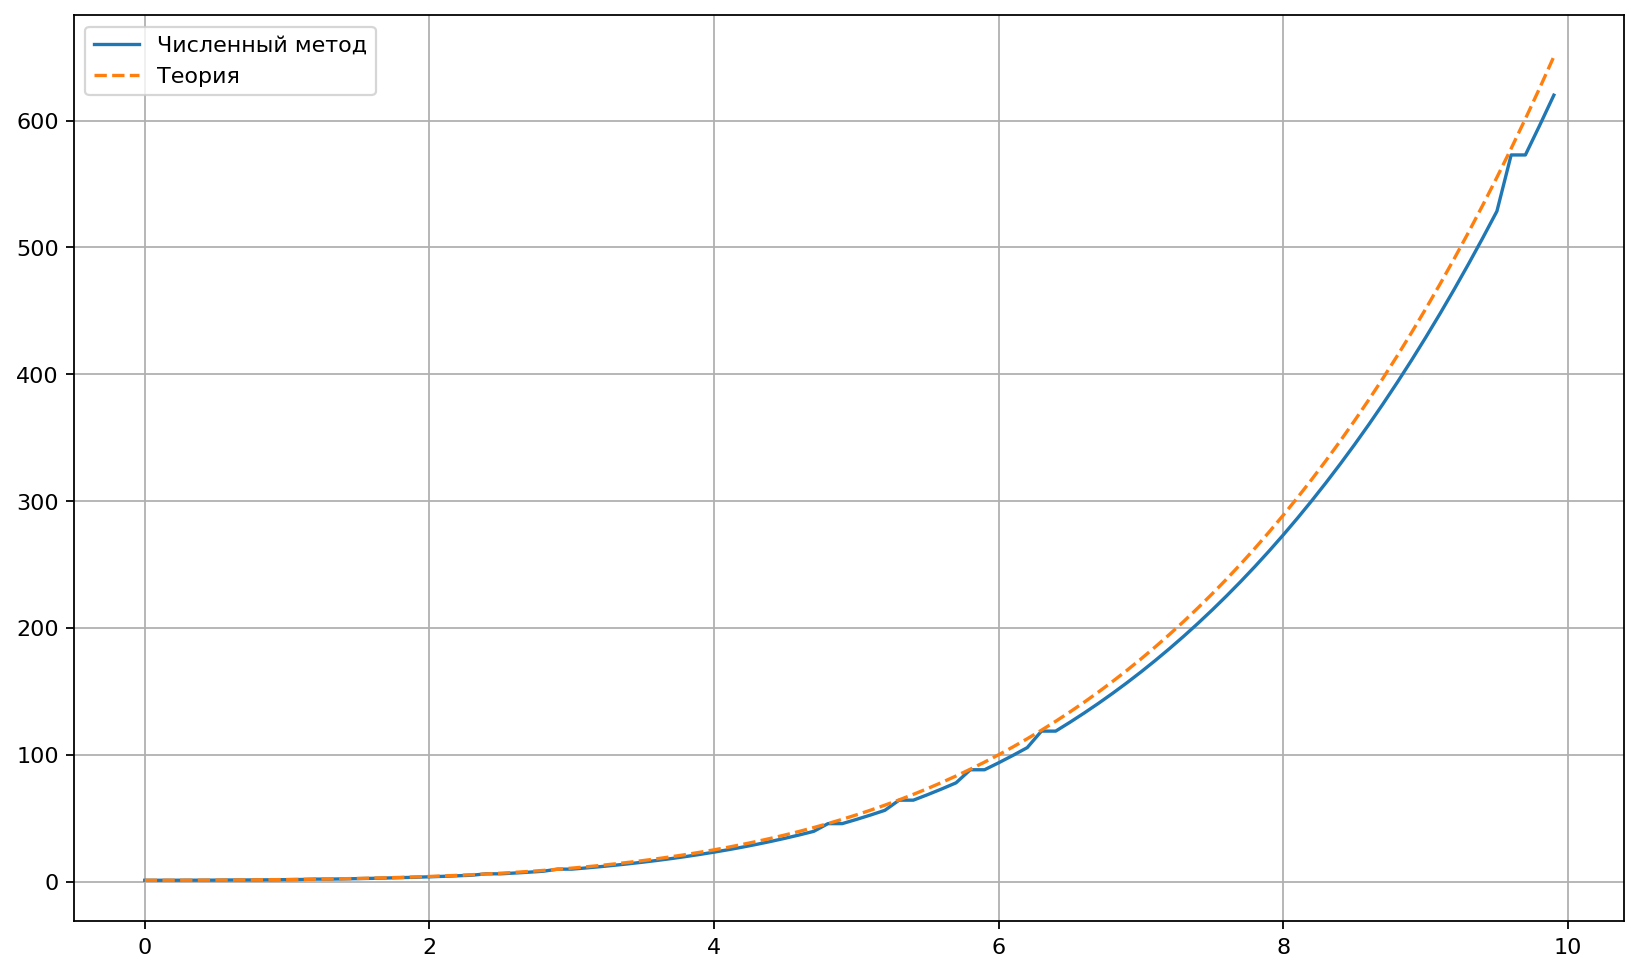

In [12]:
def F(t, u):
    return t * np.sqrt(u)

def euler(u0, T, F, tau):
    t = np.arange(0, T, tau)
    u = u0
    for i in t:
        u = u + tau * F(i, u)
    return u

a = 0
b = 10
u0 = 1
tau = 0.1


t = np.arange(a, b, tau)
u = np.zeros(len(t))
check = (1/16) * np.power((np.power(t, 2) + 4), 2)

for i, T in enumerate(t):
    u[i] = euler(u0, T, F, tau)
        

fig, ax = plt.subplots(figsize=(12.5, 7.5), dpi = 160)

ax.plot(t, u, linestyle='-', label='Численный метод')
ax.plot(t, check, linestyle='--', label='Теория')

plt.grid(True)
plt.legend()
plt.show()

### Реализовать метод Рунге-Кутта


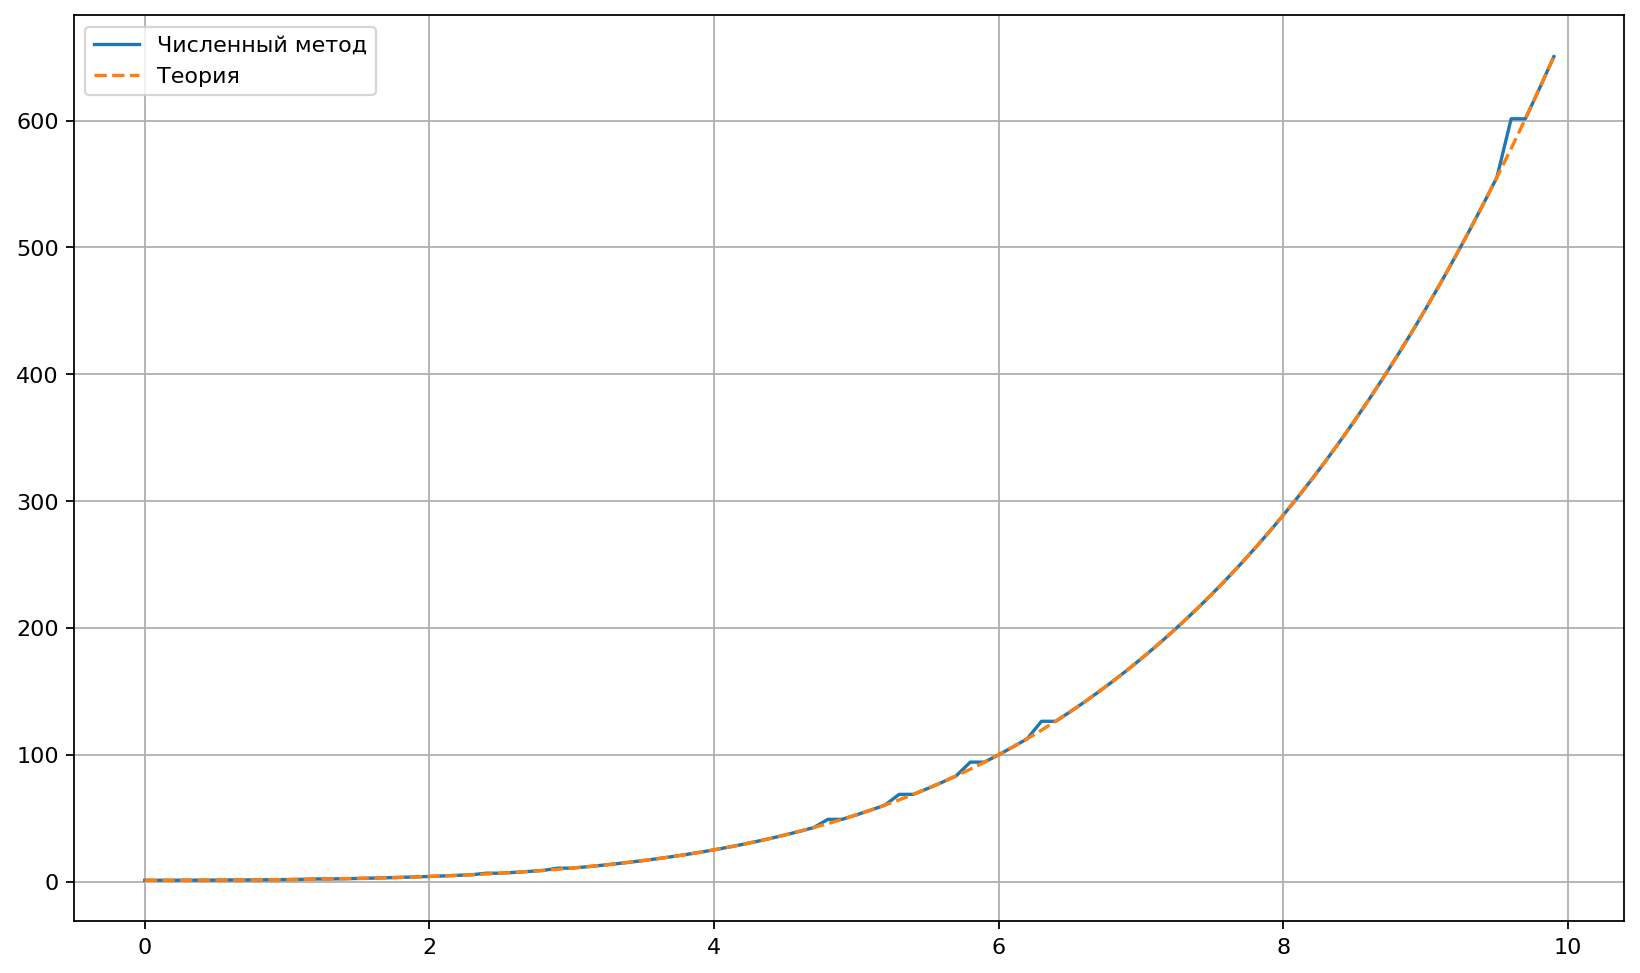

In [13]:
def F(t, u):
    return t * np.sqrt(u)

def r_k(u0, T, F, tau):
    t = np.arange(0, T, tau)
    u = u0
    for i in t:
        k1 = F(i, u)
        k2 = F(i + tau / 2, u + tau * k1 / 2)
        k3 = F(i + tau / 2, u + tau * k2 / 2)
        k4 = F(i + tau, u + tau * k3)
        u = u + tau * 1/6 * (k1 + 2 * k2 + 2 * k3 + k4)
    return u

a = 0
b = 10
u0 = 1
tau = 0.1


t = np.arange(a, b, tau)
u = np.zeros(len(t))
check = (1/16) * np.power((np.power(t, 2) + 4), 2)

for i, T in enumerate(t):
    u[i] = r_k(u0, T, F, tau)
        

fig, ax = plt.subplots(figsize=(12.5, 7.5), dpi = 160)

ax.plot(t, u, linestyle='-', label='Численный метод')
ax.plot(t, check, linestyle='--', label='Теория')

plt.grid(True)
plt.legend()
plt.show()